# Lab 1 - On Fourier series

Welcome to our first Digital Signal and Image Processing lab. If you need Python tutorials check
<ul>
<li><a href="http://docs.python-guide.org/en/latest/">Hitchhiker’s Guide to Python</a></li>
<li><a href="https://docs.python.org/2/tutorial/">The official Python tutorial</a> (NERD alert!)</li>
</ul>

Let's get started!

## Numpy

In [2]:
import numpy as np

With NumPy we can easily calculate the scalar product between vectors.

In [3]:
x = np.arange(10)
print(x)

alpha = 3
x_new = alpha*x
print(x_new)

print(np.dot(x,x_new))

[0 1 2 3 4 5 6 7 8 9]
[ 0  3  6  9 12 15 18 21 24 27]
855


## Matplotlib

Another aspect that makes Python so versatile is that we can easily visualize 1D and 2D signals. To do that we need the module: <a href="http://matplotlib.org/"><font face="TrueType">Matplotlib</font></a>.

Let's plot our first signal.

In [5]:
import matplotlib.pyplot as plt

# ----- optional commands to simply make a larger figure ---- #
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
# ----------------------------------------------------------- #

### Let's choose the sampling values 

In [30]:
### one point every 0.00001
delta = 0.00001
x = np.arange(0, 2*np.pi, delta)

## Manipulating signals

We will now start generating signals defined over $[0, 2\pi]$.

### Ramp

In [31]:
### Define the function ramp as a linear function of x. a is the rate and b is the offset at the origin

def ramp(x, a, b):
    return a*x+b            ############

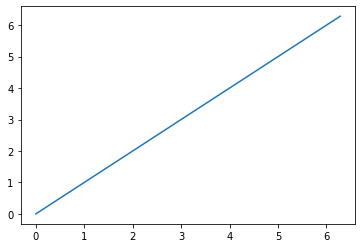

In [32]:
plt.plot(x, ramp(x,1,0))

### Sines and cosines

Let's plot the first 4 harmonics. 

Text(0, 0.5, 'sin(x)')

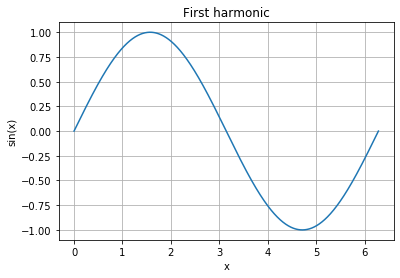

In [33]:
## sin(x)
plt.plot(x, np.sin(x))
plt.grid()
plt.xlabel('x')
plt.title('First harmonic')
plt.ylabel('sin(x)')

Text(0, 0.5, 'sin(2x)')

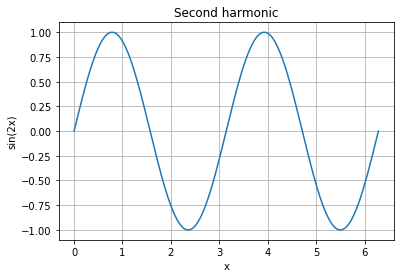

In [34]:
## sin(2x)
plt.plot(x, np.sin(2*x))
plt.grid()
plt.xlabel('x')
plt.title('Second harmonic')
plt.ylabel('sin(2x)')

Text(0, 0.5, 'sin(3x)')

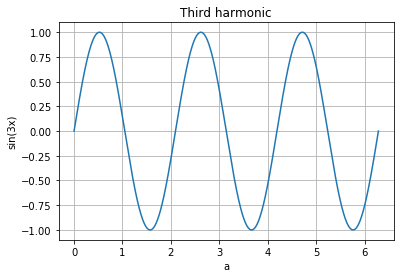

In [35]:
## sin(3x)
plt.plot(x, np.sin(3*x) )
plt.grid()
plt.xlabel('a')
plt.title('Third harmonic')
plt.ylabel('sin(3x)')

Text(0, 0.5, 'sin(4x)')

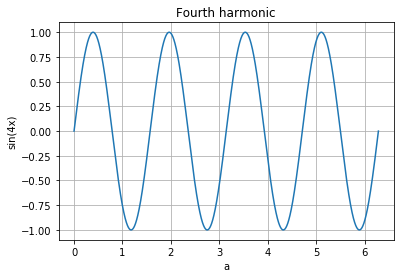

In [36]:
## sin(4x)
plt.plot(x, np.sin(4*x) )
plt.grid()
plt.xlabel('a')
plt.title('Fourth harmonic')
plt.ylabel('sin(4x)')

Now let's do the same thing with cosines.

Text(0, 0.5, 'cos(x)')

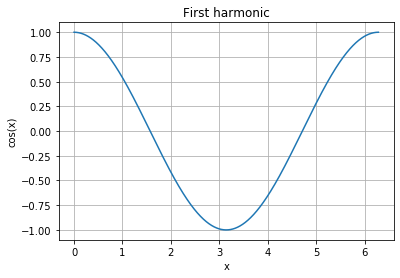

In [37]:
## cos(x)
plt.plot(x, np.cos(x))
plt.grid()
plt.xlabel('x')
plt.title('First harmonic')
plt.ylabel('cos(x)')

Text(0, 0.5, 'cos(2x)')

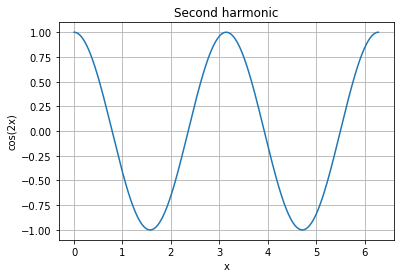

In [38]:
## cos(2x)
plt.plot(x, np.cos(2*x))
plt.grid()
plt.xlabel('x')
plt.title('Second harmonic')
plt.ylabel('cos(2x)')

If you need more than one signal in a single plot...

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


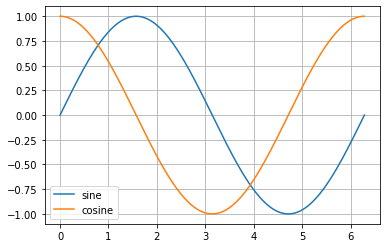

In [39]:
plt.plot(x, np.sin(x), label='sine')
plt.plot(x, np.cos(x), label='cosine')
plt.legend()
plt.grid()

If you want to split the figure in subfigures...

(-1.2, 1.2)

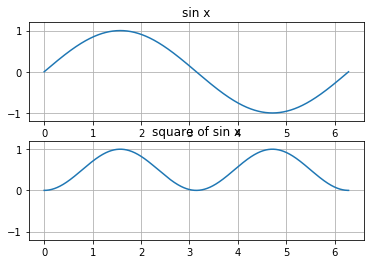

In [40]:
plt.subplot(2,1,1) # 2 rows, 1 column, write in position 1
plt.plot(x, np.sin(x))
plt.title('sin x')
plt.grid()
plt.ylim([-1.2,1.2]) # different scales on one of the axis may be misleading

plt.subplot(2,1,2) # 2 rows, 1 column, write in position 2
plt.plot(x, np.sin(x)**2) # square sine
plt.title('square of sin x')
plt.grid()
plt.ylim([-1.2,1.2])

### Triangle

Let's use the Scipy function Sawtooth

In [41]:
from scipy.signal import sawtooth

In [42]:
sawtooth??

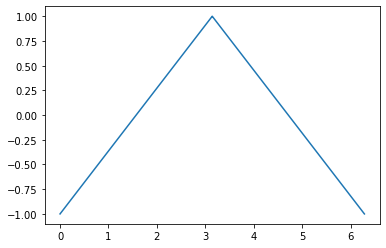

In [43]:
## set width = 0.5
plt.plot(x, sawtooth(x,0.5))

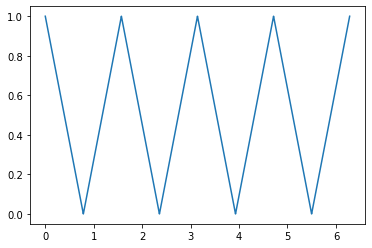

In [44]:
triang = np.abs(sawtooth(2*x,0.5))
plt.plot(x,triang)

### Square 

Similarly, we will use the SciPy function Square

1.000000746885566


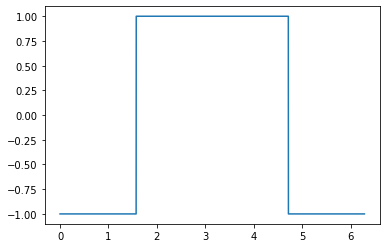

In [46]:
from scipy.signal import square

plt.plot(x, square(x-np.pi/2,0.5)) 

#check the normalisation factor

print(np.dot(square(x-np.pi/2,0.5),square(x-np.pi/2,0.5))/(2*np.pi/delta))

## Fourier series

We will now compute the Fourier series coefficients and reconstruct the signal with ita Fourier series. 

We are <b> assuming </b> that the function is always defined over $[0,2\pi]$. 

To write the function, *carefully read the class notes*.

In [47]:
def fseries(x, signal,K):
    
    """
    Returns an approximation of a given signal with a Fourier series approximation
    of K coefficients.
    
    Parameters:
    ----------
    x: independent variable (time)
    signal: function of x to be approximated
    K: number of harmonics to be used
    
    Returns:
    --------
    series: Fourier series of the signal
    a_0: coefficient with k=0 
    a: array of coefficients for odd components (cosine)
    b: array of coefficients for even components (sine)
    
    
    """
    
    ## reconstructed signal
    xr = np.zeros((len(x)))
    
    ## scaling factor
    c = (x[-1]-x[0])/len(x)
    
    a_0 = np.dot(signal, np.ones(len(x))) ## average of the signal over the range
    a_0 = c*a_0/np.pi
    
    
    ## Fourier coefficients arrays
    a = np.zeros(K)
    b = np.zeros(K)
    
    for k in range(1,K+1):
        ## evaluates coefficients
        a_k = c*np.dot(signal,np.cos(k*x))*1/np.pi
        a[k-1]=a_k
        b_k = c*np.dot(signal,np.sin(k*x))*1/np.pi
        b[k-1]=b_k
        
        ## computes series
        xr = xr + a_k*np.cos(k*x) + b_k*np.sin(k*x)
        series = 1/2*a_0+xr
    
    return series, a_0, a, b

## The approximation issue

Now you should define a function that, given a tolerance *tol*, approximates a given function *f* with *k* out of *K* components of the series.

The approximation criterion is defined as the difference between the norm of *f* and the norm of its finite approximation (Parseval).

In [23]:
def best_k(x, signal, K, tol):


    ## compute function norm keeping into account the scaling factor
    c = (x[-1]-x[0])/len(x) ##(b-a)/n
    norm = c*np.dot(signal, signal)

    for k in range(1,K+1):
        reconstructed_signal, a_0, a, b = fseries(x,signal, k)

        ## Parseval 
        approx_norm = np.pi*(np.sum(a**2) + np.sum(b**2) + a_0**2/4)

        delta = np.abs(approx_norm-norm)
        if (np.abs(delta) < tol):
            break
        
    print('the number of used harmonics is %d' % k)
    
    ## plots the signal and its approximation
    plt.plot(x, signal, 'r', label='original signal')
    plt.plot(x, reconstructed_signal, 'g', label='Fourier series')
    plt.legend(loc='upper right')
    return delta

the number of used harmonics is 1


4.999988305165459e-06

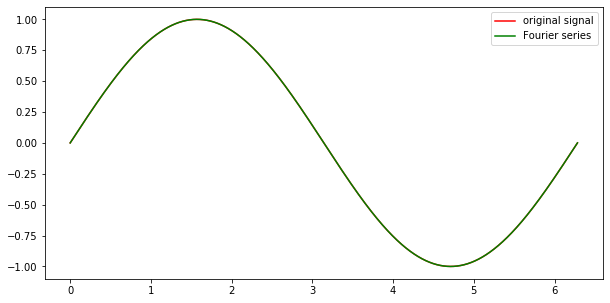

In [94]:
## CASE 1: sin(x)

signal = np.sin(x)
best_k(x, signal, 10, 10e-1)


the number of used harmonics is 3


0.004813762598552707

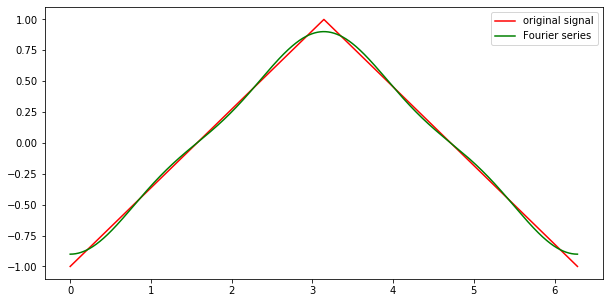

In [96]:
## CASE 2: TRIANGULAR FUNCTION

signal = sawtooth(x,0.5)
best_k(x, signal, 20, 10e-3)

the number of used harmonics is 3
0.9414845612732634
the number of used harmonics is 40
0.9629175034420143
the number of used harmonics is 60
3.5000201423832182


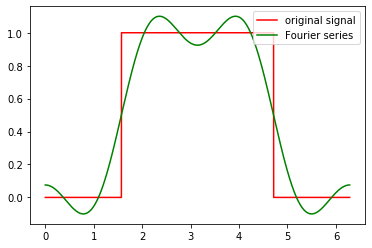

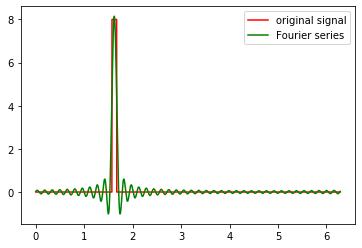

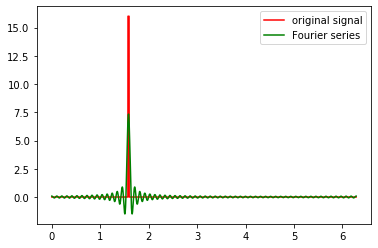

In [49]:
## CASE 3: SQUARE FUNCTION

## 3a 
signal = 1/2*(square(x-np.pi/2,0.5)+1)

delta = best_k(x, signal, 30, 10e-1)
print(delta)

## 3b 
plt.figure()
signal = 1/2*(square(x-np.pi/2,1/64)+1)*8
delta = best_k(x, signal, 60, 10e-1)
print(delta)

## 3c
plt.figure()
signal = 1/2*(square(x-np.pi/2,1/256)+1)*16
delta = best_k(x, signal, 100, 10e-1)
print(delta)

### Gibbs phenomenon

Using one of the square waves above, plot the approximation for different values of k ([10,30,80,200]). Observe what happens at the discontinuities.

The ripples next to the discontinuities are due to the <a href="https://en.wikipedia.org/wiki/Gibbs_phenomenon"> Gibbs phenomenon</a>. From this example we can sense that, in order to represent signals with strong discontinuities, we need high frequency components. This is a well-known effect that is widely used in image processing (e.g. edge detection).

In [55]:
## compute for each given K
fs_y_10 = fseries(x,square(x-np.pi/2,0.5),10) 
fs_y_30 = fseries(x,square(x-np.pi/2,0.5),30) 
fs_y_80 = fseries(x,square(x-np.pi/2,0.5),80) 
fs_y_200 = fseries(x,square(x-np.pi/2,0.5),200) 

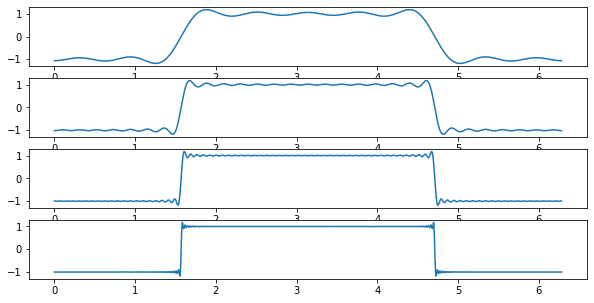

In [56]:
## plot
plt.subplot(4,1,1) # 4 rows, 1 column, write in position 1
plt.plot(x, fs_y_10[0])
plt.subplot(4,1,2) 
plt.plot(x, fs_y_30[0])
plt.subplot(4,1,3) 
plt.plot(x, fs_y_80[0])
plt.subplot(4,1,4) 
plt.plot(x, fs_y_200[0])